<a href="https://colab.research.google.com/github/AdrianPerez0306/AdministradorCorredores/blob/main/Housing%20Price%20Prediction/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediccion de precio de viviendas en California.



##*Descripcion del dataset*

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
drive.mount('/content/drive')
#########################################################
#IMPORTANTE ABAJO. YOU CAN´T SKIP THIS ADD*
########################################################
os.chdir('/content/drive/My Drive/Colab Notebooks/Data')# *MODIFICAR LA RUTA A LA CARPETA DONDE CONTENGA EL ARCHIVO.
                                                     # ===>>>  '/content/drive/My Drive/aqui_su_ruta'

In [ ]:
df_housing_raw = pd.read_csv('housing_mod.csv') #Data set crudo.

housing_dataset = df_housing_raw.copy() #Realizo copia para mejor organizacion y nombre mas comodo.

##*Analisis exploratorio del dataset.*

Primero miro la estructura del dataset y el tipo de dato al que pertenecen los labels.

In [ ]:
nro_filas, nro_columnas= housing_dataset.shape[0], housing_dataset.shape[1]
print(f'Estructura del dataset.\n-Filas:{nro_filas}\n-Columnas:{nro_columnas}\n')

Estructura del dataset.
-Filas:20640
-Columnas:10



Analizo la estructura del data set.
*   Data types, cantidad, features.
*   Algun label contiene valores NaN, Null?.
*   Categorias unicas que contienen.




In [ ]:
print('Tabla de valores Null - Boolean\n',housing_dataset.info(),'\n') #Informacion general sobre data types, quantity, dimensions, etc
print('Tabla de valores Null - Boolean\n',housing_dataset.isnull().any(),'\n') #Analisis sobre si existen valores nulos, NaN
print('Tabla de valores Null - Sumatoria\n',housing_dataset.isnull().sum(),'\n') #Cuantificacion de los valores nulos o NaN, en caso que los haya.
print('Tabla de clases unicas - Contador\n',housing_dataset.nunique(),'\n') #Categorias unicas por cada feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
Tabla de valores Null - Boolean
 None 

Tabla de valores Null - Boolean
 longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False


Matriz de correlacion.

In [ ]:
corr_matrix_housing = housing_dataset.corr()  #Matriz de correlacion. Coeficiente de Pearson

<ipython-input-5-45ecf48b7bf9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_housing = housing_dataset.corr()  #Matriz de correlacion. Coeficiente de Pearson


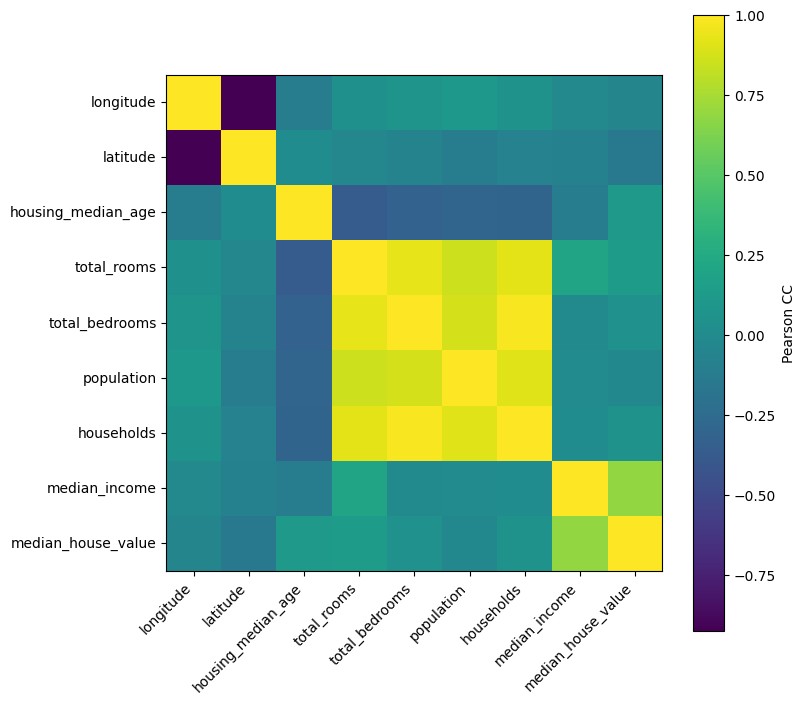

In [ ]:
#Grafico matriz
plt.figure(figsize=(8,8))
plt.imshow(corr_matrix_housing)

xt = plt.xticks(np.arange(9), housing_dataset.columns[:-1], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(9), housing_dataset.columns[:-1], rotation=0, ha='right', va='center')

plt.colorbar()

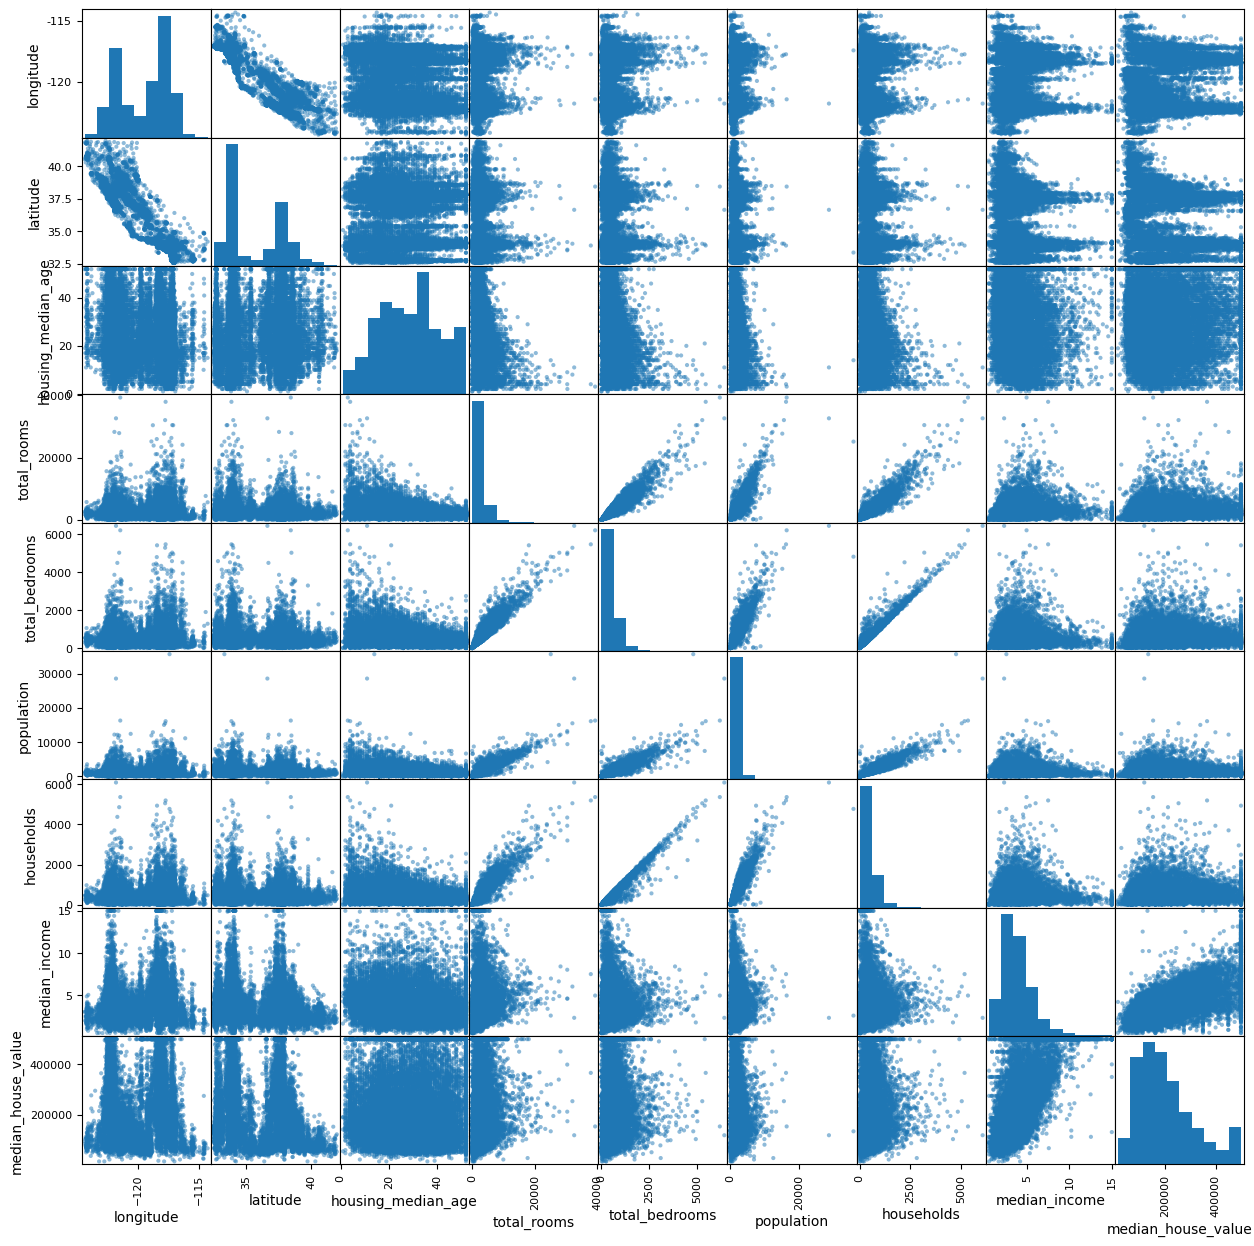

In [ ]:
pd.plotting.scatter_matrix(housing_dataset, figsize=(15,15))
plt.show()

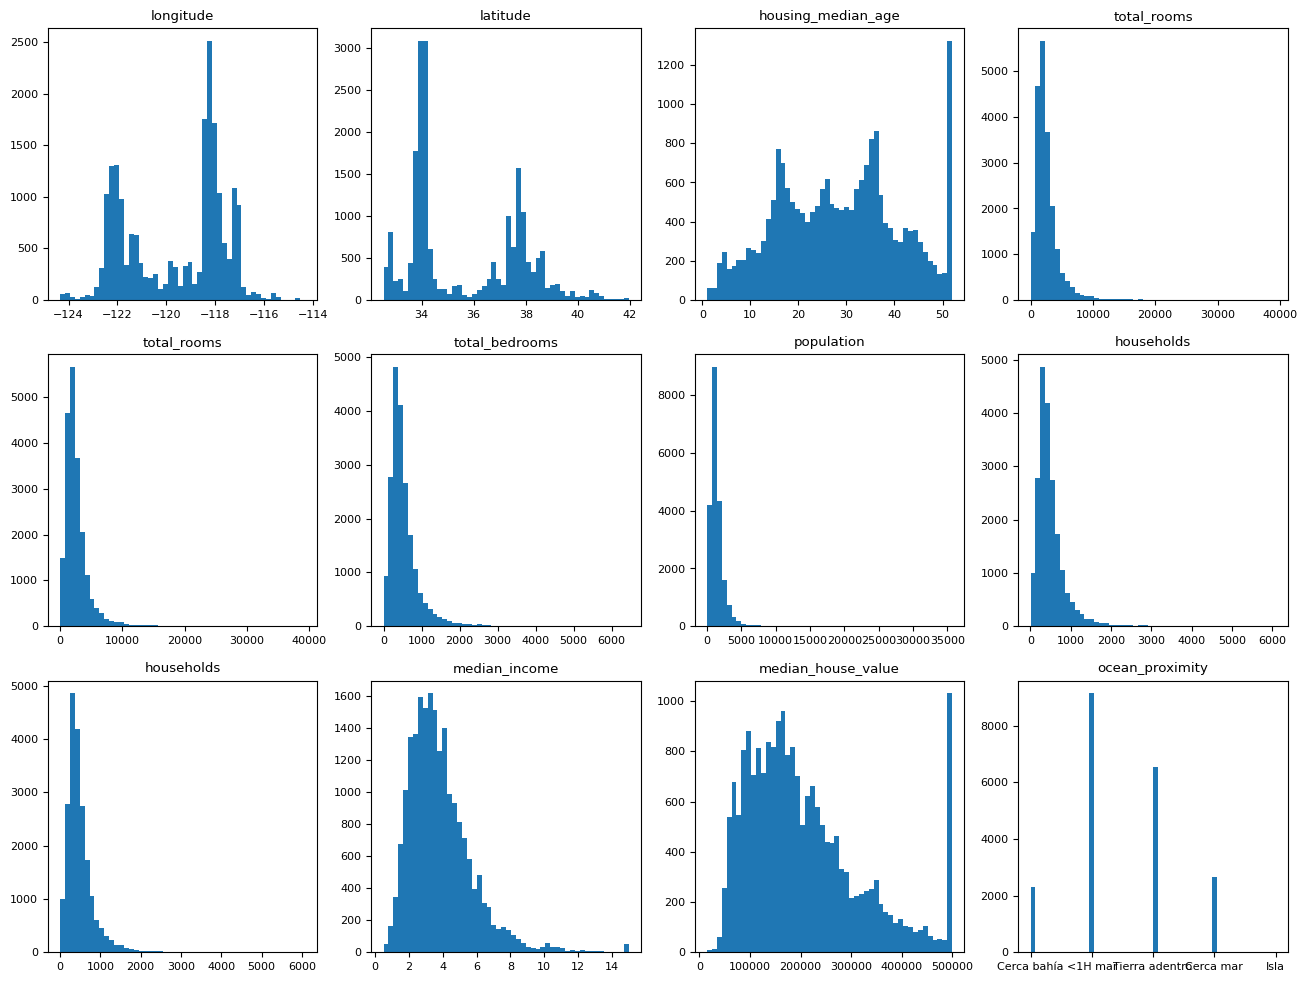

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

# Histogramas de las feautures.
columns = housing_dataset.columns.to_list()

N_colums = 4 #
N = len(columns)
N_rows = int(np.ceil(N/N_colums))

fig, ax = plt.subplots(N_rows,N_colums, figsize=(4*N_colums,4*N_rows))

for i in range(N_rows):
    for j in range(N_colums):
        ax[i,j].hist(housing_dataset[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])

Algunos features tienen exceso de valores en la cola de la distribucion. Las problematicas son `meadian_house_value` y `housing_median_age`.

In [ ]:
problematic_columns = ['housing_median_age', 'median_house_value'] #columnas problematicas

max_values=[]
for col in problematic_columns:
    max_value = df_housing_raw[col].max()
    print(f"{col}: {sum(df_housing_raw[col] == max_value)} distritos con {col} = {max_value} ({round(sum(df_housing_raw[col] == max_value)/len(df_housing_raw)*100,2)}%).")
    max_values.append(max_value)

housing_median_age: 1273 distritos con housing_median_age = 52 (6.17%).
median_house_value: 965 distritos con median_house_value = 500001 (4.68%).


In [ ]:
housing_clean = housing_dataset.copy()
# Para cada columna problemática, solo quedarse con las filas que contengan valoores diferentes a los máximos
for col, max_value in zip(problematic_columns, max_values):
    housing_clean = housing_clean[housing_clean[col] != max_value]

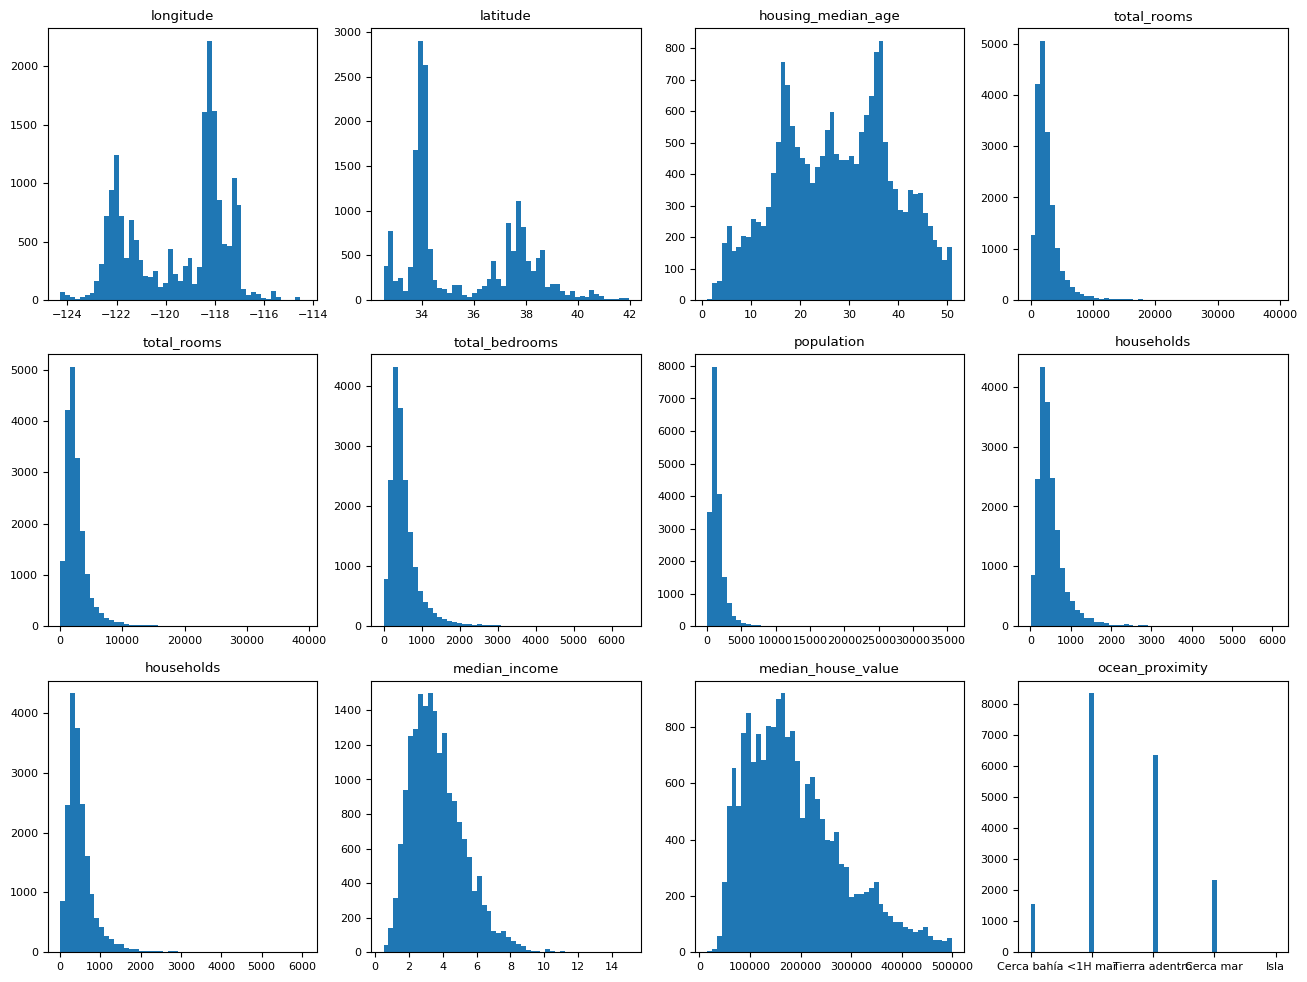

In [ ]:
# Histogramas de las feautures.
columns = housing_clean.columns.to_list()

N_colums = 4 #
N = len(columns)
N_rows = int(np.ceil(N/N_colums))

fig, ax = plt.subplots(N_rows,N_colums, figsize=(4*N_colums,4*N_rows))

for i in range(N_rows):
    for j in range(N_colums):
        ax[i,j].hist(housing_clean[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])

In [ ]:
head = 5
tail = 5
print('Primeros {} data points\n'.format(head),housing_dataset.head(head))
print('\n\nUltimos {} data points\n'.format(tail),housing_dataset.head(tail))
print('\n\nDescripcion general de los datos\n',housing_dataset.describe())

Primeros 5 data points
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600     Cerca bahía  
1        2401        1138         8.3014              358500     Cerca bahía  
2         496         177         7.2574              352100     Cerca bahía  
3         558         219         5.6431              341300     Cerca bahía  
4         565         259         3.8462              342200     Cerca bahía  


Ultimos 5 data points
    longitude  latitude  ho

Luego de analizar los datos se puede ver:
* Alta correlacion en:
  1.   longitud, latitud. Negativa.
  2.   total_rooms, total_bedrooms, populationm households. Positiva.
  3.   median_income, median_house_value.
* Datos nulos en feature total_bedrooms. Un total de 207.
* Feature categorico ocean_proximity. Hay que codificarlo.  

##Preprocesado automatico de distintos modelos con Pipelines.

###Armado del Pipeline
En el preprocesado la idea es armar una arquitectura de  2 pipelines en paralelo, para realizar el preprocesamiento de variables numericas y categoricas por separado. Para esto es necesario separar las features en numericas y categoricas.

In [ ]:
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income']

categorical_features = ['ocean_proximity']

target = 'median_house_value'

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [ ]:
#TENGO QUE pasar total_bedrooms a int y median_house_value a float.

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline',numerical_pipeline, numerical_features),
    ('cat_pipeline',categorical_pipeline, categorical_features)],
    n_jobs=-1)

In [ ]:
# Modelos a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

In [ ]:
pipe_linear = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classiffier', LinearRegression()),
                       ]
                       )

pipe_tree = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classiffier', DecisionTreeRegressor(random_state=14))
                       ]
                     )

pipe_forest = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classiffier', RandomForestRegressor(random_state=14, verbose=1))
                       ]
                      )

pipe_svr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classiffier', SVR(kernel='linear', verbose=True))
                       ]
                    )
#El problema con param grid y GridSearchCV es que tarda mucho, y hasta colapsa en algunos casos. OJO
param_grid_tree = {'classiffier__criterion' : ['squared_error', 'absolute_error'],
                   'classiffier__splitter' : ['best', 'random'],
                   'classiffier__max_depth' : [2, 4, 6, 8, 10]}


param_grid_forest = {'classiffier__criterion' : ['squared_error', 'absolute_error'],
                     'classiffier__n_estimators' : [100, 150, 250, 500],
                     'classiffier__max_depth' : [2, 4, 6, 8]}

param_grid_svr = {'classiffier__C' : [0.025, 0.05, 0.1, 1, 10],
                  'classiffier__coef0' : [0, 1, 1.5, 2, 3]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV #GSCV

rscv_tree = RandomizedSearchCV(pipe_tree, param_grid_tree, scoring='r2', cv=5, n_iter=5)
rscv_forest = RandomizedSearchCV(pipe_forest, param_grid_forest, scoring='r2', cv=5, n_iter=5)
rscv_svr = RandomizedSearchCV(pipe_svr, param_grid_svr, scoring='r2', cv=5, n_iter=5)

In [ ]:
from sklearn import set_config

set_config(display='diagram')
display(pipe_svr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['ocean_proximity'])])),
                ('classiffier', SVR(kernel='linear', verbose=True))])

In [ ]:
from sklearn.model_selection import train_test_split

X = housing_clean.drop(target, axis=1)
y = housing_clean[target]
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Entrenamiento y evaluacion de modelo LinearRegression().

In [ ]:
pipe_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['ocean_proximity'])])),
                ('classiffier', LinearRegression())])

In [ ]:
score = pipe_linear.score(X_test, y_test)

In [ ]:
print(f"Model score: {score}") # model accuracy

Model score: 0.6067953652583093


In [ ]:
y_predict_linear = pipe_linear.predict(X_test)

In [ ]:
print(len(y_predict_linear))
print(len(y_test))

3715
3715


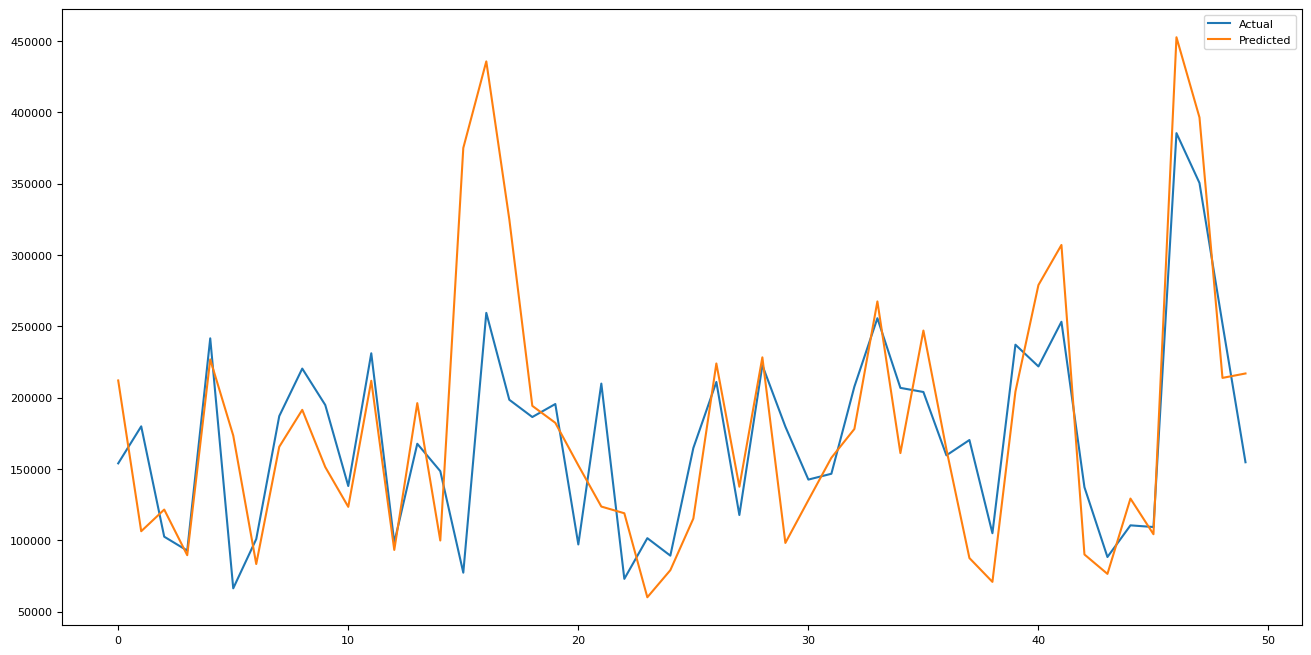

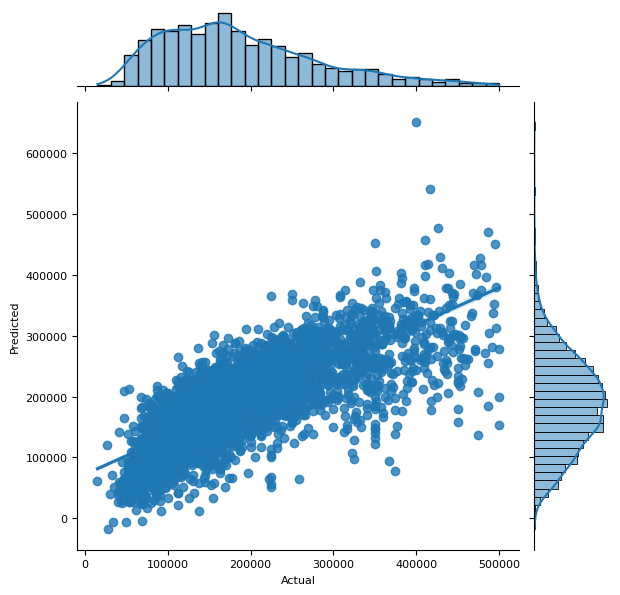

In [ ]:
prediction_vs_real = pd.DataFrame({'Predicted':y_predict_linear,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
prediction_vs_real = prediction_vs_real.reset_index()
prediction_vs_real = prediction_vs_real.drop(['index'],axis=1)
plt.plot(prediction_vs_real[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=prediction_vs_real,kind='reg',);

In [ ]:
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear))
R2_linear = metrics.r2_score(y_test,y_predict_linear)

In [ ]:
print('El error absoluto medio es:', MAE_linear)
print('El error cuadrado medio es:', MSE_linear)
print('La raiz del error cuadrado medio es:', RMSE_linear)
print('El R cuadrado de la regresión lineal es:', R2_linear)

El error absoluto medio es: 43437.66983861643
El error cuadrado medio es: 3555935037.1726027
La raiz del error cuadrado medio es: 59631.66136518923
El R cuadrado de la regresión lineal es: 0.6067953652583093


###Entrenamiento y evaluacion de modelo DecisionTreeRegressor().

In [ ]:
rscv_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat_pipeline',
                                                                               Pipeline(steps=[...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one-hot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['ocean_proximity'])])),
                                             ('classiffier',
                                              DecisionTreeRegressor(random_state=14))]),
                   n_iter=5,
                   param_distributions={'classiffier__criterion': ['squared_error',
                                                                   'absolute_error'],
                                        'classiffier__max_depth': [2, 4, 6, 8,
                                                                   10],
                                        'classiffier__splitter': ['best',
                                                                  'random']},
                   scoring='r2')

In [ ]:
score_tree = rscv_tree.best_score_

In [ ]:
print(f"Model score: {score}") # model accuracy

Model score: 0.6067953652583093


In [ ]:
y_predict_tree = rscv_tree.best_estimator_.predict(X_test)

In [ ]:
print(len(y_predict_tree))
print(len(y_test))

3715
3715


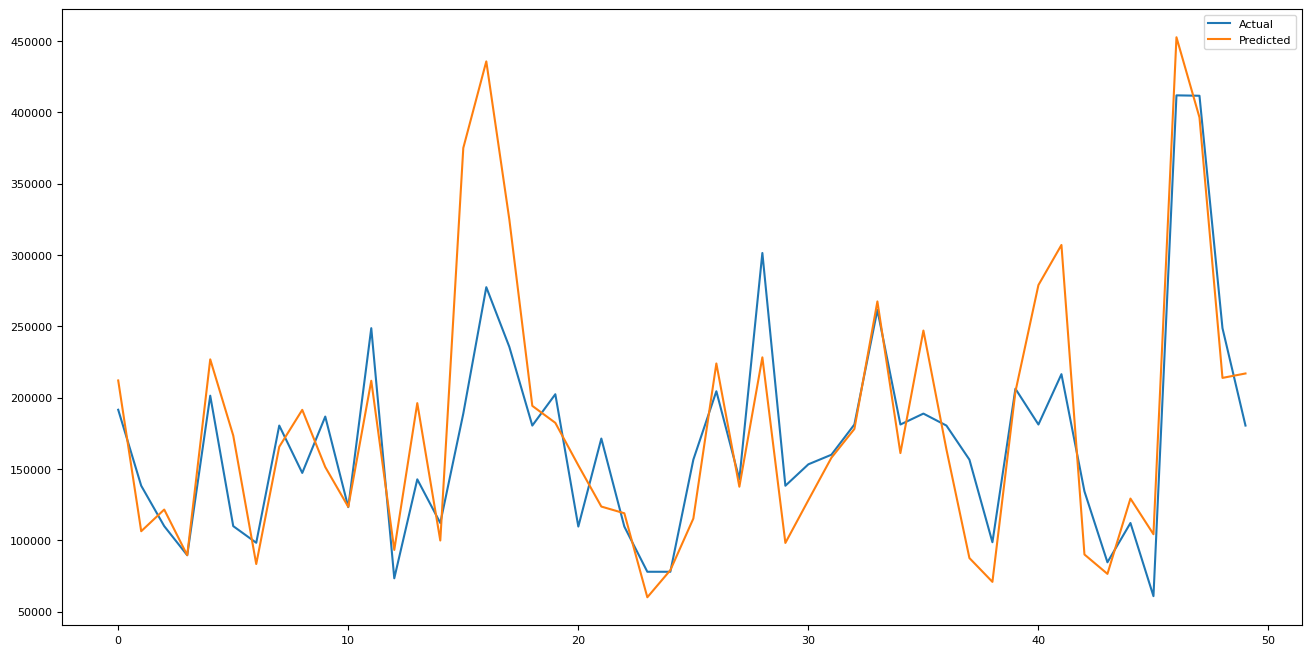

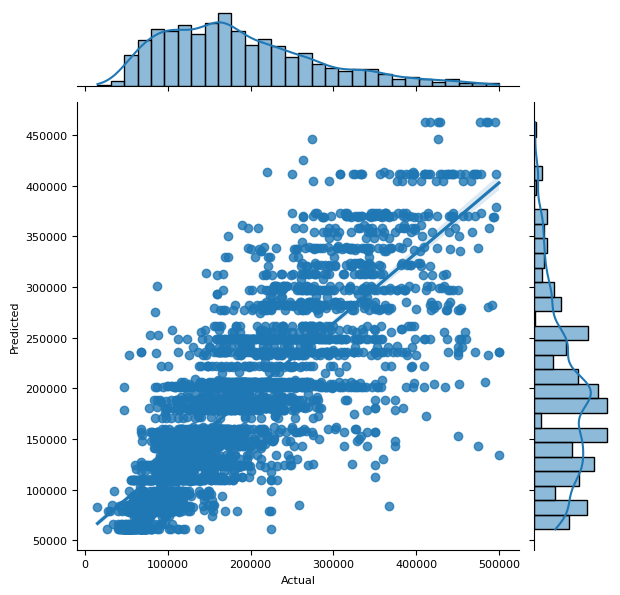

In [ ]:
prediction_vs_real = pd.DataFrame({'Predicted':y_predict_tree,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
prediction_vs_real = prediction_vs_real.reset_index()
prediction_vs_real = prediction_vs_real.drop(['index'],axis=1)
plt.plot(prediction_vs_real[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=prediction_vs_real,kind='reg',);

In [ ]:
MAE_tree = metrics.mean_absolute_error(y_test,y_predict_tree)
MSE_tree = metrics.mean_squared_error(y_test,y_predict_tree)
RMSE_tree = np.sqrt(metrics.mean_squared_error(y_test,y_predict_tree))
R2_tree = metrics.r2_score(y_test,y_predict_tree)
print('El error absoluto medio es:', MAE_tree)
print('El error cuadrado medio es:', MSE_tree)
print('La raiz del error cuadrado medio es:', RMSE_tree)
print('El R cuadrado de la regresión lineal es:', R2_tree)

El error absoluto medio es: 38508.369038216406
El error cuadrado medio es: 3058854846.004556
La raiz del error cuadrado medio es: 55306.9149926531
El R cuadrado de la regresión lineal es: 0.6617610024148788


###Entrenamiento y evaluacion de modelo RandomForestRegressor().

NOTA: Si utilizo esta estructura de Pipeline compuesto, random forest no termina nunca, tira errores de conexion al server.

Probar hacer el preprocesado del training/test set, y luego aplicar el pipeline para predecir, aplicar unn preprocesado sobre los nuevos datos, con decorators, o funciones. El resto de estructuras funciona bien con el pipeline.

In [ ]:
rscv_forest.fit(X_train, y_train)

In [ ]:
score_forest = rscv_tree.best_score_

In [ ]:
print(f"Model score: {score}") # model accuracy

Model score: 0.6067953652583093


In [ ]:
y_predict_forest = rscv_forest.best_estimator_.predict(X_test)

In [ ]:
print(len(y_predict_forest))
print(len(y_test))

In [ ]:
prediction_vs_real = pd.DataFrame({'Predicted':y_predict_forest,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
prediction_vs_real = prediction_vs_real.reset_index()
prediction_vs_real = prediction_vs_real.drop(['index'],axis=1)
plt.plot(prediction_vs_real[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=prediction_vs_real,kind='reg',);

In [ ]:
MAE_forest = metrics.mean_absolute_error(y_test,y_predict_forest)
MSE_forest = metrics.mean_squared_error(y_test,y_predict_forest)
RMSE_forest = np.sqrt(metrics.mean_squared_error(y_test,y_predict_forest))
R2_forest = metrics.r2_score(y_test,y_predict_forest)
print('El error absoluto medio es:', MAE_forest)
print('El error cuadrado medio es:', MSE_forest)
print('La raiz del error cuadrado medio es:', RMSE_forest)
print('El R cuadrado de la regresión lineal es:', R2_forest)

###Entrenamiento y evaluacion de modelo SVR().

In [ ]:
rscv_svr.fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat_pipeline',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one-hot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['ocean_proximity'])])),
                                             ('classiffier',
                                              SVR(kernel='linear',
                                                  verbose=True))]),
                   param_distributions={'classiffier__C': [0.025, 0.05, 0.1, 1,
                                                           10],
                                        'classiffier__coef0': [0, 1, 1.5, 2,
                                                               3]},
                   scoring='r2')

In [ ]:
score_svr = rscv_svr.best_score_

In [ ]:
print(f"Model score: {score}") # model accuracy

Model score: 0.6132648328505725


In [ ]:
y_predict_svr = rscv_svr.best_estimator_.predict(X_test)

In [ ]:
print(len(y_predict_svr))
print(len(y_test))

3715
3715


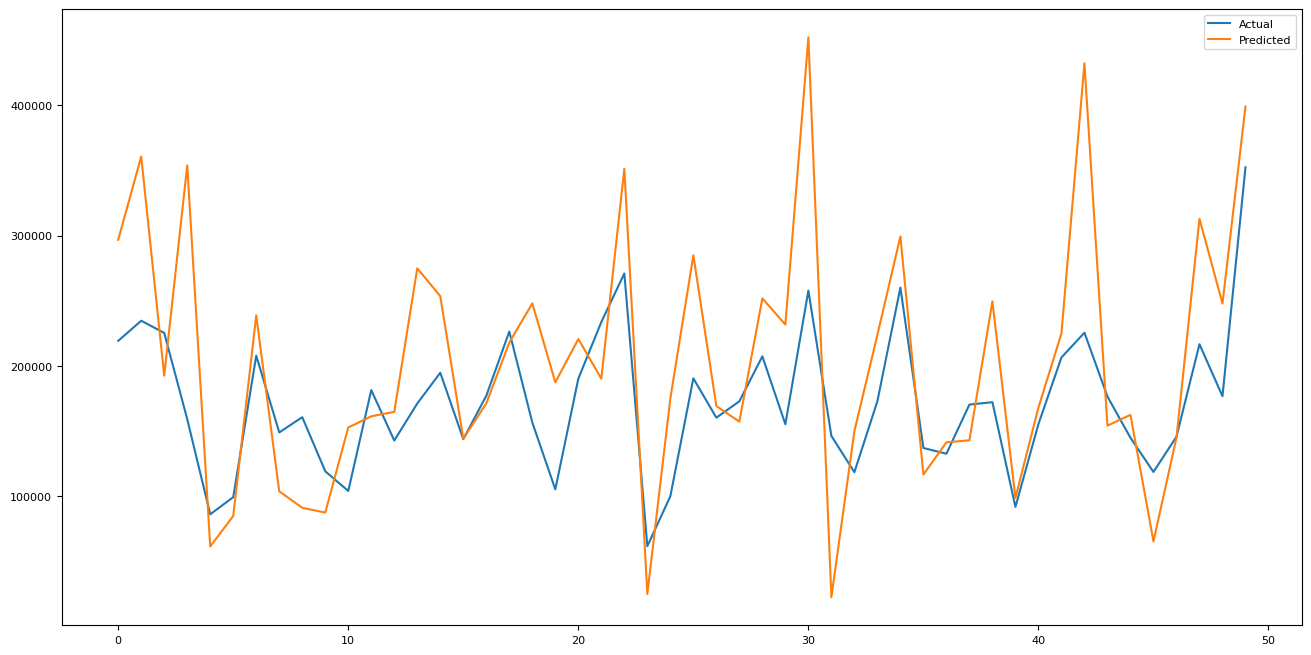

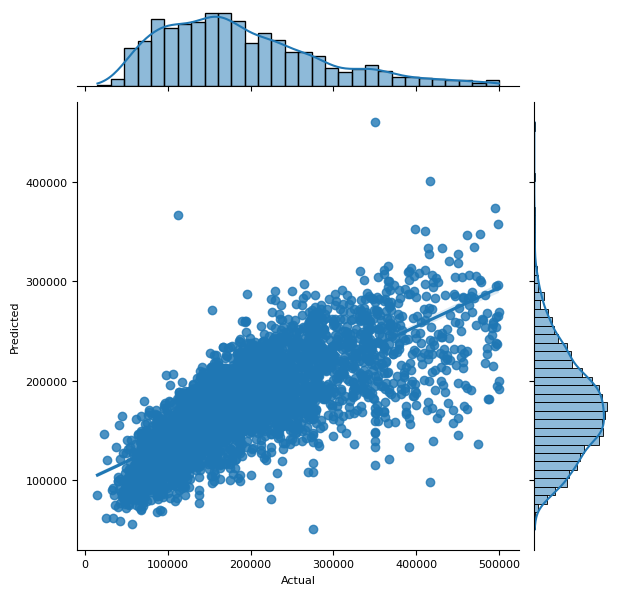

In [ ]:
prediction_vs_real = pd.DataFrame({'Predicted':y_predict_svr,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
prediction_vs_real = prediction_vs_real.reset_index()
prediction_vs_real = prediction_vs_real.drop(['index'],axis=1)
plt.plot(prediction_vs_real[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=prediction_vs_real,kind='reg',);

In [ ]:
MAE_svr = metrics.mean_absolute_error(y_test,y_predict_svr)
MSE_svr = metrics.mean_squared_error(y_test,y_predict_svr)
RMSE_svr = np.sqrt(metrics.mean_squared_error(y_test,y_predict_svr))
R2_svr = metrics.r2_score(y_test,y_predict_svr)
print('El error absoluto medio es:', MAE_svr)
print('El error cuadrado medio es:', MSE_svr)
print('La raiz del error cuadrado medio es:', RMSE_svr)
print('El R cuadrado de la regresión lineal es:', R2_svr)

El error absoluto medio es: 49311.76321132539
El error cuadrado medio es: 4884239075.459726
La raiz del error cuadrado medio es: 69887.33129444654
El R cuadrado de la regresión lineal es: 0.48500722437983734


###Comparacion metrica R2

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Tree Decision Regressor', 'SVR'],
            y=[R2_linear, score_tree, score_svr])
ax.set_title('Accuracy of all models')
plt.show()
# score_forest,